# **Using Machine Learning to Predict Coronary Heart Disease in Patients**

By: Koushik Jandhyala\
Library credit of University of California, Irvine ([https://archive.ics.uci.edu/ml/datasets/heart+disease](https://archive.ics.uci.edu/ml/datasets/heart+disease))

First mount your google drive to this collab script, in order to read in the dataset an other things

In [ ]:
#Mount Drive

from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#change the directory to the folder with the datasets
%cd /content/drive/MyDrive/ML_S23-Mauro/MachineLearning/EDA/EDA Final Project

Mounted at /content/drive
/content/drive/MyDrive/ML_S23-Mauro/MachineLearning/EDA/EDA Final Project


Next, we will import the necessary modules which are:

- pandas
- numpy
- matplotlib (pyplot)

In [ ]:
#Import the modules using the 'import' command

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Take the data files and process them into a pandas dataframe while also doing all the pre processsing

This is how to intepret the data:
(get from .names file)

In [ ]:
#TODO: Add the other data frames, and then combine. Also add collumn names
columnNames = ['Age', 'Sex', 'Chest Pain Type', 'Resting Blood Pressure', 'Cholesterol', 'Fasting Blood Sugar', 'Resting ECG', 'Max Heart Rate', 'Exercise Induced Angina', 'ST Depression', 'Slope of ST Peak', 'Number of Major Vessels', 'Thalassemia', 'Diagnosis']
heartDisease_DataFrame = pd.DataFrame(pd.concat([pd.read_csv('processed_cleveland.data', names=columnNames), pd.read_csv('processed_hungarian.data', names=columnNames)])).reset_index().drop('index', axis=1)   #, pd.read_csv('processed_switzerland.data', names=columnNames), pd.read_csv('processed_va.data', names=columnNames)

#The 'Number of Major Vessels' and 'Thalassemia' collumns are full of NaN's, so lets drop it completely
heartDisease_DataFrame = heartDisease_DataFrame.drop(['Number of Major Vessels', 'Thalassemia', 'Slope of ST Peak'], axis=1)

#Replace the ? for NaN values and then accordingly fix all the NaNs
heartDisease_DataFrame = heartDisease_DataFrame.replace('?', np.nan).astype('float')

heartDisease_DataFrame['Resting Blood Pressure'] = heartDisease_DataFrame['Resting Blood Pressure'].fillna(heartDisease_DataFrame['Resting Blood Pressure'].mean())
heartDisease_DataFrame['Cholesterol'] = heartDisease_DataFrame['Cholesterol'].fillna(heartDisease_DataFrame['Cholesterol'].mode().values[0])
heartDisease_DataFrame = heartDisease_DataFrame.drop(labels=['Fasting Blood Sugar', 'Resting ECG', 'Max Heart Rate', 'Exercise Induced Angina'], axis=1) #, inplace=True)
# heartDisease_DataFrame.loc[heartDisease_DataFrame['Diagnosis'] >= 1.0, 'Diagnosis'] = 1

print(heartDisease_DataFrame.to_string())


# heartDisease_DataFrame.head()

      Age  Sex  Chest Pain Type  Resting Blood Pressure  Cholesterol  ST Depression  Diagnosis
0    63.0  1.0              1.0              145.000000        233.0            2.3        0.0
1    67.0  1.0              4.0              160.000000        286.0            1.5        2.0
2    67.0  1.0              4.0              120.000000        229.0            2.6        1.0
3    37.0  1.0              3.0              130.000000        250.0            3.5        0.0
4    41.0  0.0              2.0              130.000000        204.0            1.4        0.0
5    56.0  1.0              2.0              120.000000        236.0            0.8        0.0
6    62.0  0.0              4.0              140.000000        268.0            3.6        3.0
7    57.0  0.0              4.0              120.000000        354.0            0.6        0.0
8    63.0  1.0              4.0              130.000000        254.0            1.4        2.0
9    53.0  1.0              4.0              140.0

# **Lasso Regression**

Next, use SciKitLearn to make a test-train split of your data.

In [ ]:
#Import those nessesary to do the learning
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Store the 'Diagnosis', the indep. variable Y, in a variable and drop the 'diagnosis' column from the main dataframe
diagnosis = heartDisease_DataFrame['Diagnosis']
heartDisease_DataFrame.drop(['Diagnosis'], axis=1, inplace=True) #, 'Sex', 'Chest Pain Type', 'Fasting Blood Sugar', 'Resting ECG', 'Exercise Induced Angina', 'Slope of ST Peak'

#Make the train test spilt
symptoms_train, symptoms_test, diagnosis_train, diagnosis_test = train_test_split(heartDisease_DataFrame, diagnosis, test_size=.20, random_state=34)

symptoms_test.head()

,Age,Sex,Chest Pain Type,Resting Blood Pressure,Cholesterol,ST Depression
524,59.0,0.0,4.0,130.0,338.0,1.5
210,37.0,0.0,3.0,120.0,215.0,0.0
28,43.0,1.0,4.0,150.0,247.0,1.5
249,62.0,1.0,2.0,128.0,208.0,0.0
138,35.0,1.0,4.0,120.0,198.0,1.6


Intialize the Lasso Regression model and fit the model. Once done fitting the model, find the best lambda value

In [ ]:
lambdaPossibilities = np.arange(0, 1, 0.01)
correspondingLambdaScores = np.array([])

X_train = symptoms_train
X_test = symptoms_test
Y_train = diagnosis_train
Y_test = diagnosis_test


def optimize_lambda(lambdaValue):
  lassoModel= linear_model.Lasso(alpha=lambdaValue)
  lassoModel.fit(X_train, Y_train)

  trainScore = lassoModel.score(X_train, Y_train)
  testScore = lassoModel.score(X_test, Y_test)

  return testScore


for possibleValueOfLambda in lambdaPossibilities:
  correspondingLambdaScores = np.append(correspondingLambdaScores, optimize_lambda(possibleValueOfLambda))


#Find the best lambda value
bestLambda = max(correspondingLambdaScores)
print(lambdaPossibilities[np.where(correspondingLambdaScores == bestLambda)])

lassoModel= linear_model.Lasso(alpha=float(lambdaPossibilities[np.where(correspondingLambdaScores == bestLambda)]))
lassoModel.fit(X_train, Y_train)

bestScore = lassoModel.score(X_test, Y_test)
# bestScore = lassoModel.score(X_train, Y_train)

print("The best value for lambda(alpha) is", lambdaPossibilities[np.where(correspondingLambdaScores == bestLambda)], "because the score is", bestScore)

<ipython-input-5-28740f30256c>:12: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoModel.fit(X_train, Y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+02, tolerance: 4.442e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


[0.]
The best value for lambda(alpha) is [0.] because the score is 0.41741644134196865


<ipython-input-5-28740f30256c>:29: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoModel.fit(X_train, Y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+02, tolerance: 4.442e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Print the information from the best lambda like



*   Train Score
*   Test Score
*   Non-zero coefficients



In [ ]:
lassoModel1= linear_model.Lasso(alpha=0)
lassoModel1.fit(X_train, Y_train)

bestScore1 = lassoModel1.score(X_train, Y_train)
bestScore2 = lassoModel1.score(X_test, Y_test)

print("""Train Score: {}
Test Score: {}
Non-zero coeffs: {}""".format(bestScore1, bestScore2, lassoModel1.coef_))

Train Score: 0.3715594839143158
Test Score: 0.41741644134196865
Non-zero coeffs: [1.57900755e-02 2.73338545e-01 2.62962274e-01 1.26497260e-04
 5.20431399e-04 3.49113196e-01]


<ipython-input-6-6a14eeee7704>:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lassoModel1.fit(X_train, Y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+02, tolerance: 4.442e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


Print some graphs of correleations within the data

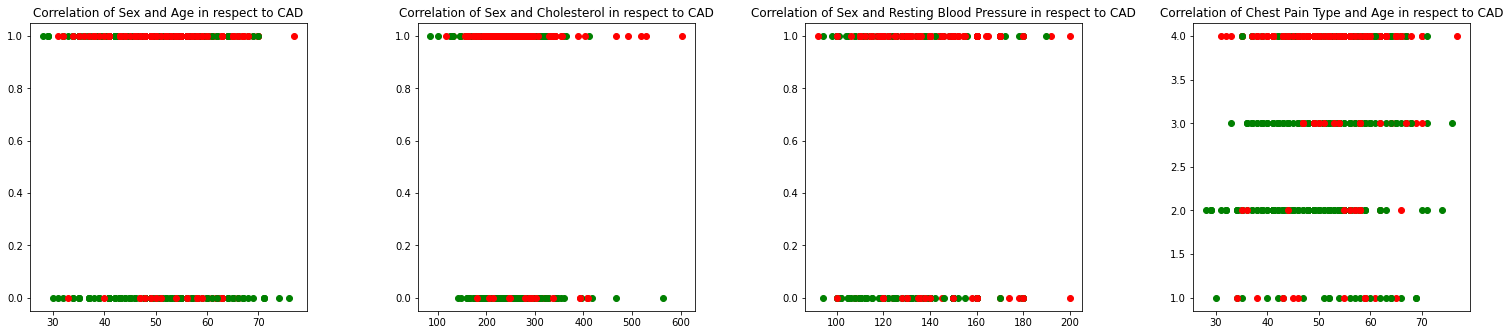

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20,5))

#Plot 1
colors = []
y = heartDisease_DataFrame[['Sex']].to_numpy()
x = heartDisease_DataFrame[['Age']].to_numpy()
z = diagnosis.to_numpy()


for i in range(len(x)):
    if z[i] >= 1.0:
        colors.append('red')  
    else:
        colors.append('green') 
  
for i in range(len(x)):
    ax[0].scatter(x[i], y[i], c = colors[i])
ax[0].set_title("Correlation of Sex and Age in respect to CAD")


#Plot 2
colors = []
y = heartDisease_DataFrame[['Sex']].to_numpy()
x = heartDisease_DataFrame[['Cholesterol']].to_numpy()
z = diagnosis.to_numpy()
  
for i in range(len(x)):
    if z[i] >= 1.0:
        colors.append('red')  
    else:
        colors.append('green') 
  
for i in range(len(x)):
    ax[1].scatter(x[i], y[i], c = colors[i])
ax[1].set_title("Correlation of Sex and Cholesterol in respect to CAD")




#Plot 3
colors = []
y = heartDisease_DataFrame[['Sex']].to_numpy()
x = heartDisease_DataFrame[['Resting Blood Pressure']].to_numpy()
z = diagnosis.to_numpy()
  
for i in range(len(x)):
    if z[i] >= 1.0:
        colors.append('red')  
    else:
        colors.append('green') 
  
for i in range(len(x)):
    ax[2].scatter(x[i], y[i], c = colors[i])
ax[2].set_title("Correlation of Sex and Resting Blood Pressure in respect to CAD")



#Plot 4
colors = []
y = heartDisease_DataFrame[['Chest Pain Type']].to_numpy()
x = heartDisease_DataFrame[['Age']].to_numpy()
z = diagnosis.to_numpy()
  
for i in range(len(x)):
    if z[i] >= 1.0:
        colors.append('red')  
    else:
        colors.append('green') 
  
for i in range(len(x)):
    ax[3].scatter(x[i], y[i], c = colors[i])
ax[3].set_title("Correlation of Chest Pain Type and Age in respect to CAD")

plt.subplots_adjust(left=0.1, bottom=0.1, right=1.1, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

Now, lets create a a plot which compares the model scores between the alpha value

<ipython-input-8-9b3b72fc08c8>:10: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso.fit(X_train, Y_train)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+02, tolerance: 4.442e-02 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


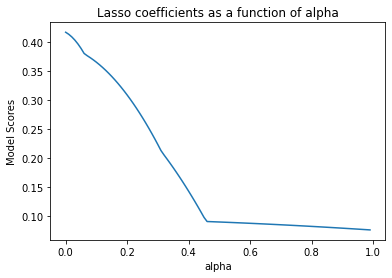

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

alphas = np.arange(0, 1, 0.01)
lasso = linear_model.Lasso(max_iter=10000)
scores = []

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, Y_train)
    scores.append(lasso.score(X_test, Y_test))

ax = plt.gca()

ax.plot(alphas, scores)
ax.set_xscale('linear')
plt.axis('tight')
plt.xlabel('alpha')
plt.ylabel('Model Scores')
plt.title('Lasso coefficients as a function of alpha');

# **Linear Regression**

Getting combinations code credit of [datagy.io](https://datagy.io/python-combinations-of-a-list/)

In [ ]:
#Matplotlib Graphs of each indep varible

def MLR(X, Y):
  model = linear_model.LinearRegression()
  model.fit(X, Y)

  return [model.intercept_, model.coef_, r2_score(Y, model.predict(X))]



#Make a list of all the possible combinations
from itertools import combinations

sample_list = symptoms_train.columns.to_numpy()
list_combinations = []

for n in range(len(sample_list) + 1):
    list_combinations += list(combinations(sample_list, n))

# print(list(list_combinations[34]))
Y = diagnosis

for mlr_values in range(1, len(list_combinations)):
  currentMLRNames = list(list_combinations[mlr_values])
  currentMLRValues = MLR(heartDisease_DataFrame[currentMLRNames], Y)

  print("{}                           {} \n".format(currentMLRNames, currentMLRValues[2]))

['Age']                           0.07910662083777031 

['Sex']                           0.038168831132415315 

['Chest Pain Type']                           0.1644382841247508 

['Resting Blood Pressure']                           0.01597983992554941 

['Cholesterol']                           0.008895867790312817 

['ST Depression']                           0.27286003806788606 

['Age', 'Sex']                           0.12461792080930478 

['Age', 'Chest Pain Type']                           0.21464083305603432 

['Age', 'Resting Blood Pressure']                           0.08284027908863456 

['Age', 'Cholesterol']                           0.08255946691255611 

['Age', 'ST Depression']                           0.29656484878396716 

['Sex', 'Chest Pain Type']                           0.1861894861635387 

['Sex', 'Resting Blood Pressure']                           0.053631196743576526 

['Sex', 'Cholesterol']                           0.050065827415263886 

['Sex', 'ST Depressio